In [53]:
import pandas as pd
df1 = pd.read_csv("eda1.csv",encoding='gbk')
df2 = pd.read_csv("eda2.csv",encoding='gbk')
df3 = pd.read_csv("eda3.csv",encoding='gbk')

In [54]:
df1.head(2)

Title                                            el_link  \
0   英恒科技（中国）有限公司  https://jobs.51job.com/xian-gxjs/138745590.htm...   
1  苏州极目机器人科技有限公司  https://jobs.51job.com/suzhou-gyyq/141316450.h...   

          Name    salary                   description                   dc  \
0  算法工程师（数据处理）  1.5-2.5万  西安-高新技术产业开发区  |  2年经验  |  硕士  外资（非欧美） | 500-1000人   
1    数据融合算法工程师      2-4万       苏州-工业园区  |  1年经验  |  本科      民营公司 | 150-500人   

             int                                         Unnamed: 7  \
0  电子技术/半导体/集成电路  职位描述：1、负责毫米波雷达的数据处理算法方案设计与仿真：包括雷达数据的匹配、跟踪、滤波；2...   
1  电子技术/半导体/集成电路  岗位职责：1）负责基于激光雷达、毫米波雷达和视觉多传感器的三维建图；2）研发基于激光雷达、毫...   

                                            cutwords  
0  职位 描述 负责 毫米波 雷达 数据处理 算法 方案设计 仿真 包括 雷达 数据 匹配 跟踪...  
1  岗位职责 负责 激光雷达 毫米波 雷达 视觉 传感器 三维 建图 研发 激光雷达 毫米波 雷...

In [55]:
df2.head(2)

Title           City  Salary experience education  \
0  算法工程师（数据方向）  苏州·苏州工业园区·独墅湖  15-30K       1-3年        本科   
1    气象数据算法工程师     西安·长安区·航天城  10-15K       3-5年        本科   

                                             benefit  \
0                             免费班车，餐补，交通补助，股票期权，员工旅游   
1  五险一金，餐补，加班补助，员工旅游，年终奖，带薪年假，零食下午茶，交通补助，通讯补贴，定期体...   

                                                link  \
0  https://www.zhipin.com/job_detail/2d9f7a585116...   
1  https://www.zhipin.com/job_detail/7ae575441f27...   

                                             details  \
0  1、本科以上学历，有1年以上Python开发经验；\r\n2、熟练掌握Python Scra...   
1  职位描述1. 负责大气廓线探测数据的算法研究、产品研发工作； \r\n2. 针对多源地基遥感...   

                                            cutwords  
0  本科 以上学历 Python 开发 经验 熟练掌握 Python Scrapy Pyquer...  
1  职位 描述 负责 大气 廓线 探测 数据 算法 研究 产品 研发 工作 多源 地基 遥感 设...

In [56]:
df3.head(2)

position_name   salary company_name        company_type  \
0  数据库/ai /图像算法工程师（22/23届硕士）  15k-20k         杰为软件         移动互联网,企业服务    
1            电池算法开发工程师（数据中心）  17k-25k         中国汽研  旅游｜出行,专业服务｜咨询,制造业    

  company_shape company_money city experience education  \
0      150-500人          未融资    深圳       1年以下        硕士   
1     500-2000人         上市公司    重庆         不限        本科   

                                     position_detail  \
0  任职要求：\r\n1、硕士及以上学历，计算机软件、应用数学、人工智能等相关专业，2022届或...   
1  岗位职责：\r\n1.负责新能源汽车电池系统安全预警算法的设计与开发，负责电池系统健康状态评...   

                                            cutwords  
0  任职 硕士 以上学历 计算机软件 数学 人工智能 相关 专业 2022 2023 毕业生 研...  
1  岗位职责 负责 新能源 汽车 电池 系统安全 预警 算法 设计 开发 负责 电池 系统 健康...

In [57]:
import re

def extract_info(desc):

    city = ""
    experience = ""
    education = ""

    if pd.isna(desc):
        return pd.Series([city, experience, education])

    parts = [p.strip() for p in desc.split("|") if p.strip()]

    if len(parts) >= 1:
        city_part = parts[0]
        city = city_part.split("-")[0].strip()

    if len(parts) >= 2:
        exp_part = parts[1]
        exp_pattern = re.compile(r"(\d+年经验|[\d-]+年经验|应届生|无经验|不限经验)")
        exp_match = exp_pattern.search(exp_part)
        if exp_match:
            experience = exp_match.group(0)

    if len(parts) >= 3:
        edu_part = parts[2]
        edu_list = ["博士", "硕士", "本科", "大专", "中专", "高中", "初中", "小学"]
        for edu in edu_list:
            if edu in edu_part:
                education = edu
                break

    return pd.Series([city, experience, education])

df1[["city", "experience", "education"]] = df1["description"].apply(extract_info)


In [58]:
import pandas as pd
import re

def standardize_salary(salary_str):

    if pd.isna(salary_str) or not isinstance(salary_str, str):
        return (0.0, 0.0, 0.0)

    s = salary_str.strip() \
        .replace("·", " ") \
        .replace("k", "K") \
        .replace(" ", "") \
        .replace("每年", "") \
        .replace("千以下", "K")

    patterns = {
        "day": re.compile(r"(\d+)-(\d+)元/天"),
        "bonus_k": re.compile(r"(\d+)-(\d+)K(\d+)薪"),
        "bonus_wan": re.compile(r"(\d+\.?\d*)(千|万)-(\d+\.?\d*)(千|万)(\d+)薪"),
        "pure_k": re.compile(r"(\d+)-(\d+)K"),
        "pure_nian": re.compile(r"(\d+)-(\d+)万/年"),
        "pure_wan": re.compile(r"(\d+\.?\d*)-(\d+\.?\d*)万"),
        "year_wan": re.compile(r"(\d+)-(\d+)万"),
        "wan_k_mix": re.compile(r"(\d+)千-(\d+\.?\d*)万")
    }

    lower, upper = 0.0, 0.0

    if patterns["day"].search(s):
        d_low, d_high = patterns["day"].findall(s)[0]
        d_low, d_high = float(d_low), float(d_high)
        lower = d_low * 22
        upper = d_high * 22

    elif patterns["bonus_k"].search(s):
        k_low, k_high, bonus = patterns["bonus_k"].findall(s)[0]
        k_low, k_high, bonus = float(k_low), float(k_high), int(bonus)
        base_low = k_low * 1000
        base_high = k_high * 1000
        lower = (base_low * bonus) / 12
        upper = (base_high * bonus) / 12

    elif patterns["pure_nian"].search(s):
        k_low, k_high = patterns["pure_nian"].findall(s)[0]
        lower = float(k_low) * 10000/12
        upper = float(k_high) * 10000/12


    elif patterns["bonus_wan"].search(s):
        num1, unit1, num2, unit2, bonus = patterns["bonus_wan"].findall(s)[0]
        bonus = int(bonus)
        num1 = float(num1) * 1000 if unit1 == "千" else float(num1) * 10000
        num2 = float(num2) * 1000 if unit2 == "千" else float(num2) * 10000
        lower = (num1 * bonus) / 12
        upper = (num2 * bonus) / 12

    elif patterns["pure_k"].search(s):
        k_low, k_high = patterns["pure_k"].findall(s)[0]
        lower = float(k_low) * 1000
        upper = float(k_high) * 1000

    elif patterns["pure_wan"].search(s):
        w_low, w_high = patterns["pure_wan"].findall(s)[0]
        lower = float(w_low) * 10000
        upper = float(w_high) * 10000

    elif patterns["year_wan"].search(s):
        y_low, y_high = patterns["year_wan"].findall(s)[0]
        lower = (float(y_low) * 10000) / 12
        upper = (float(y_high) * 10000) / 12

    elif patterns["wan_k_mix"].search(s):
        k_val, w_val = patterns["wan_k_mix"].findall(s)[0]
        lower = float(k_val) * 1000
        upper = float(w_val) * 10000

    max_normal_salary = 100000
    if lower > max_normal_salary:
        lower = 0.0
    if upper > max_normal_salary:
        upper = 0.0
    lower = max(lower, 0.0)
    upper = max(upper, 0.0)

    avg = (lower + upper) / 2 if (lower + upper) > 0 else 0.0
    return (round(lower, 2), round(upper, 2), round(avg, 2))

def process_all_salary(df1, df2, df3):
    df3[["salary_lower", "salary_upper", "salary_avg"]] = df3["salary"].apply(
        lambda x: pd.Series(standardize_salary(x))
    )
    df2[["salary_lower", "salary_upper", "salary_avg"]] = df2["Salary"].apply(
        lambda x: pd.Series(standardize_salary(x))
    )
    df1[["salary_lower", "salary_upper", "salary_avg"]] = df1["salary"].apply(
        lambda x: pd.Series(standardize_salary(x))
    )
    return df1, df2, df3
df1, df2, df3 = process_all_salary(df1, df2, df3)


In [59]:
import pandas as pd
import re
def extract_core_city(city_str):
    if pd.isna(city_str) or not isinstance(city_str, str):
        return ""

    city_part = re.split(r"·|-|\s", city_str.strip())[0]

    core_cities = [
        "北京", "上海", "广州", "深圳", "天津", "重庆",
        "苏州", "杭州", "南京", "武汉", "成都", "西安",
        "郑州", "青岛", "宁波", "无锡", "长沙", "合肥",
        "福州", "厦门", "大连", "沈阳", "长春", "哈尔滨",
        "济南", "昆明", "贵阳", "南宁", "海口", "石家庄",
        "太原", "呼和浩特", "银川", "兰州", "西宁", "乌鲁木齐"
    ]

    for city in core_cities:
        if city_part.startswith(city):
            return city

    return city_part

df2["city"] = df2["City"].apply(extract_core_city)


In [60]:
cols = ["education", "city", "salary_avg"]
final_df = pd.concat([df1[cols], df2[cols], df3[cols]], ignore_index=True)
final_df = final_df[(final_df["salary_avg"] > 0) & (final_df["city"] != "")].reset_index(drop=True)

In [61]:

edu_mapping = {
    "博士": "Doctor",
    "硕士": "Master",
    "本科": "Bachelor",
    "大专": "College",
    "中专": "Vocational",
    "高中": "High School",
    "初中": "Middle School",
    "小学": "Primary School",
    "学历不限": "Unlimited Education",
    "应届生": "Fresh Graduate"
}

city_mapping = {
    "北京": "Beijing",
    "上海": "Shanghai",
    "广州": "Guangzhou",
    "深圳": "Shenzhen",
    "西安": "Xi'an",
    "苏州": "Suzhou",
    "昆明": "Kunming",
    "郑州": "Zhengzhou",
    "南京": "Nanjing",
    "武汉": "Wuhan",
    "大连": "Dalian",
    "无锡": "Wuxi",
    "东莞": "Dongguan",
    "成都": "Chengdu",
    "杭州": "Hangzhou",
    "佛山": "Foshan",
    "重庆": "Chongqing",
    "长沙": "Changsha",
    "义乌": "Yiwu",
    "芜湖": "Wuhu",
    "宜昌": "Yichang",
    "嘉兴": "Jiaxing",
    "福州": "Fuzhou",
    "合肥": "Hefei",
    "南阳": "Nanyang",
    "南通": "Nantong",
    "厦门": "Xiamen",
    "太原": "Taiyuan",
    "唐山": "Tangshan",
    "青岛": "Qingdao",
    "济南": "Jinan",
    "常州": "Changzhou",
    "威海": "Weihai",
    "台州": "Taizhou",
    "南昌": "Nanchang",
    "珠海": "Zhuhai",
    "天津": "Tianjin",
    "徐州": "Xuzhou",
    "沈阳": "Shenyang",
    "抚顺": "Fushun",
    "衢州": "Quzhou",
    "潍坊": "Weifang"
}

col_mapping = {
    "education": "Education",
    "city": "City",
    "salary_avg": "Average Monthly Salary (CNY)"
}

df = final_df[final_df["education"].isin(edu_mapping.keys())].reset_index(drop=True)

df_english = df.rename(columns=col_mapping)

df_english["Education"] = df_english["Education"].map(edu_mapping)

df_english["City"] = df_english["City"].map(city_mapping).fillna(df_english["City"])

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager

plt.rcParams["font.size"] = 10
plt.rcParams["axes.linewidth"] = 0.8
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["savefig.format"] = "png"

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

/tmp/ipython-input-719050190.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax.boxplot(


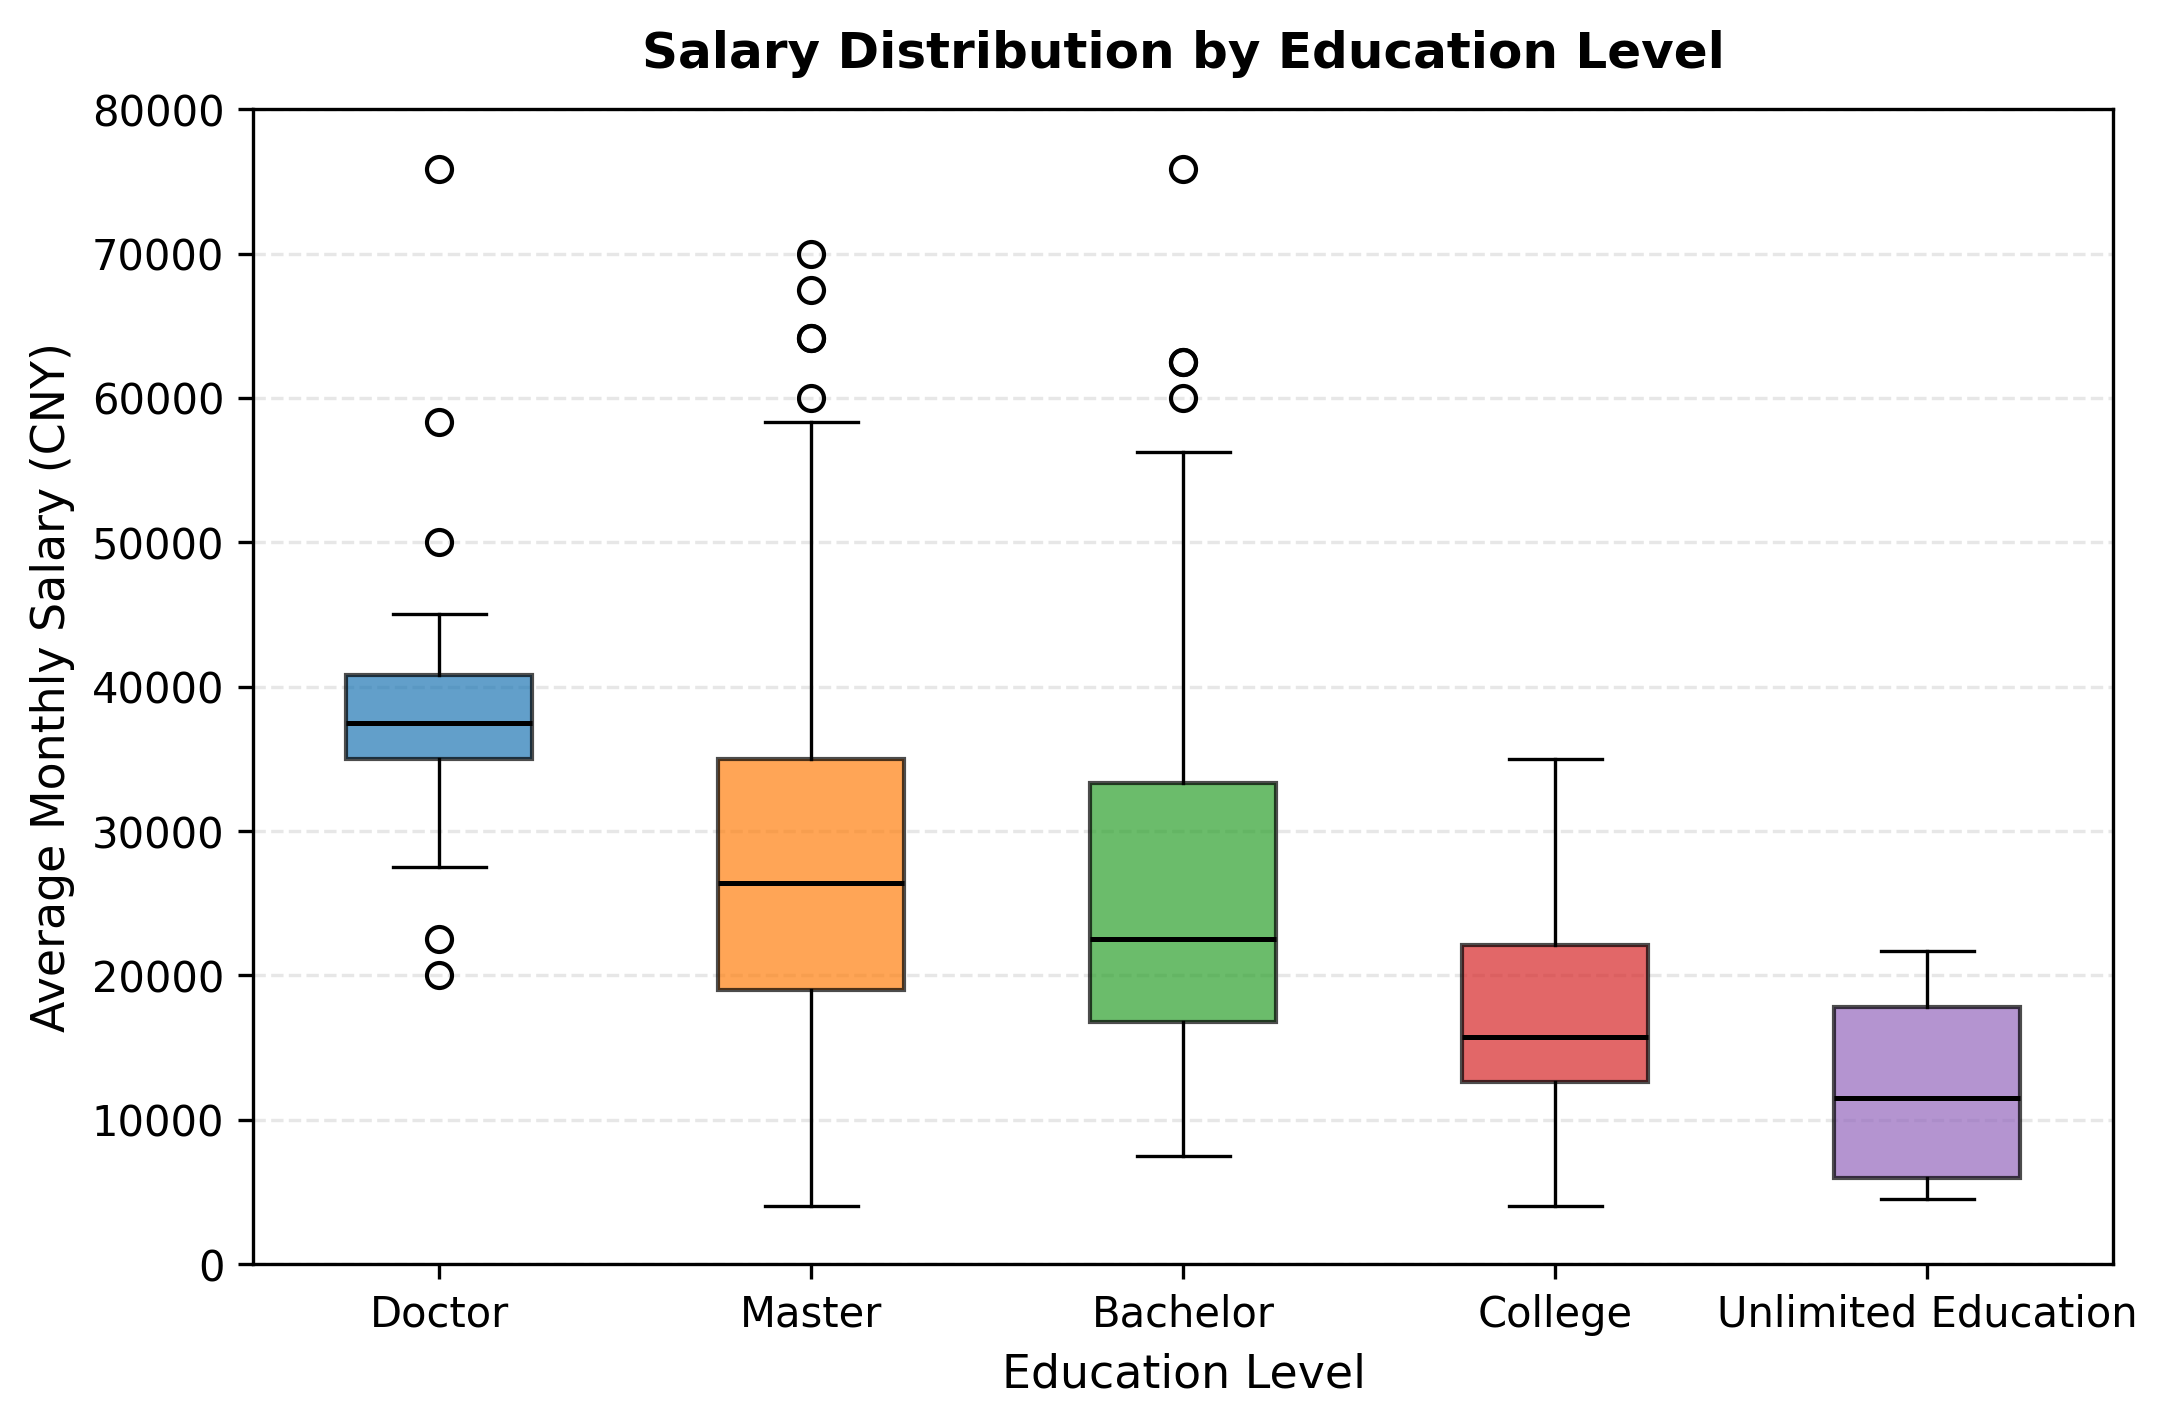

In [63]:
main_edu = ["Doctor","Master", "Bachelor", "College", "Unlimited Education"]
df_edu = df_english[df_english["Education"].isin(main_edu)]

fig, ax = plt.subplots(figsize=(8, 5))
box_plot = ax.boxplot(
    [df_edu[df_edu["Education"] == edu]["Average Monthly Salary (CNY)"] for edu in main_edu],
    labels=main_edu,
    patch_artist=True,
    medianprops={"color": "black", "linewidth": 1.2},
    boxprops={"facecolor": colors[0], "alpha": 0.7},
    whiskerprops={"linewidth": 0.8},
    capprops={"linewidth": 0.8}
)

for patch, color in zip(box_plot["boxes"], colors[:len(main_edu)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_title("Salary Distribution by Education Level", fontsize=12, fontweight="bold", pad=10)
ax.set_xlabel("Education Level", fontsize=11)
ax.set_ylabel("Average Monthly Salary (CNY)", fontsize=11)
ax.grid(axis="y", linestyle="--", alpha=0.3)
ax.set_ylim(0, 80000)

plt.savefig("salary_by_education_boxplot.png")
plt.show()

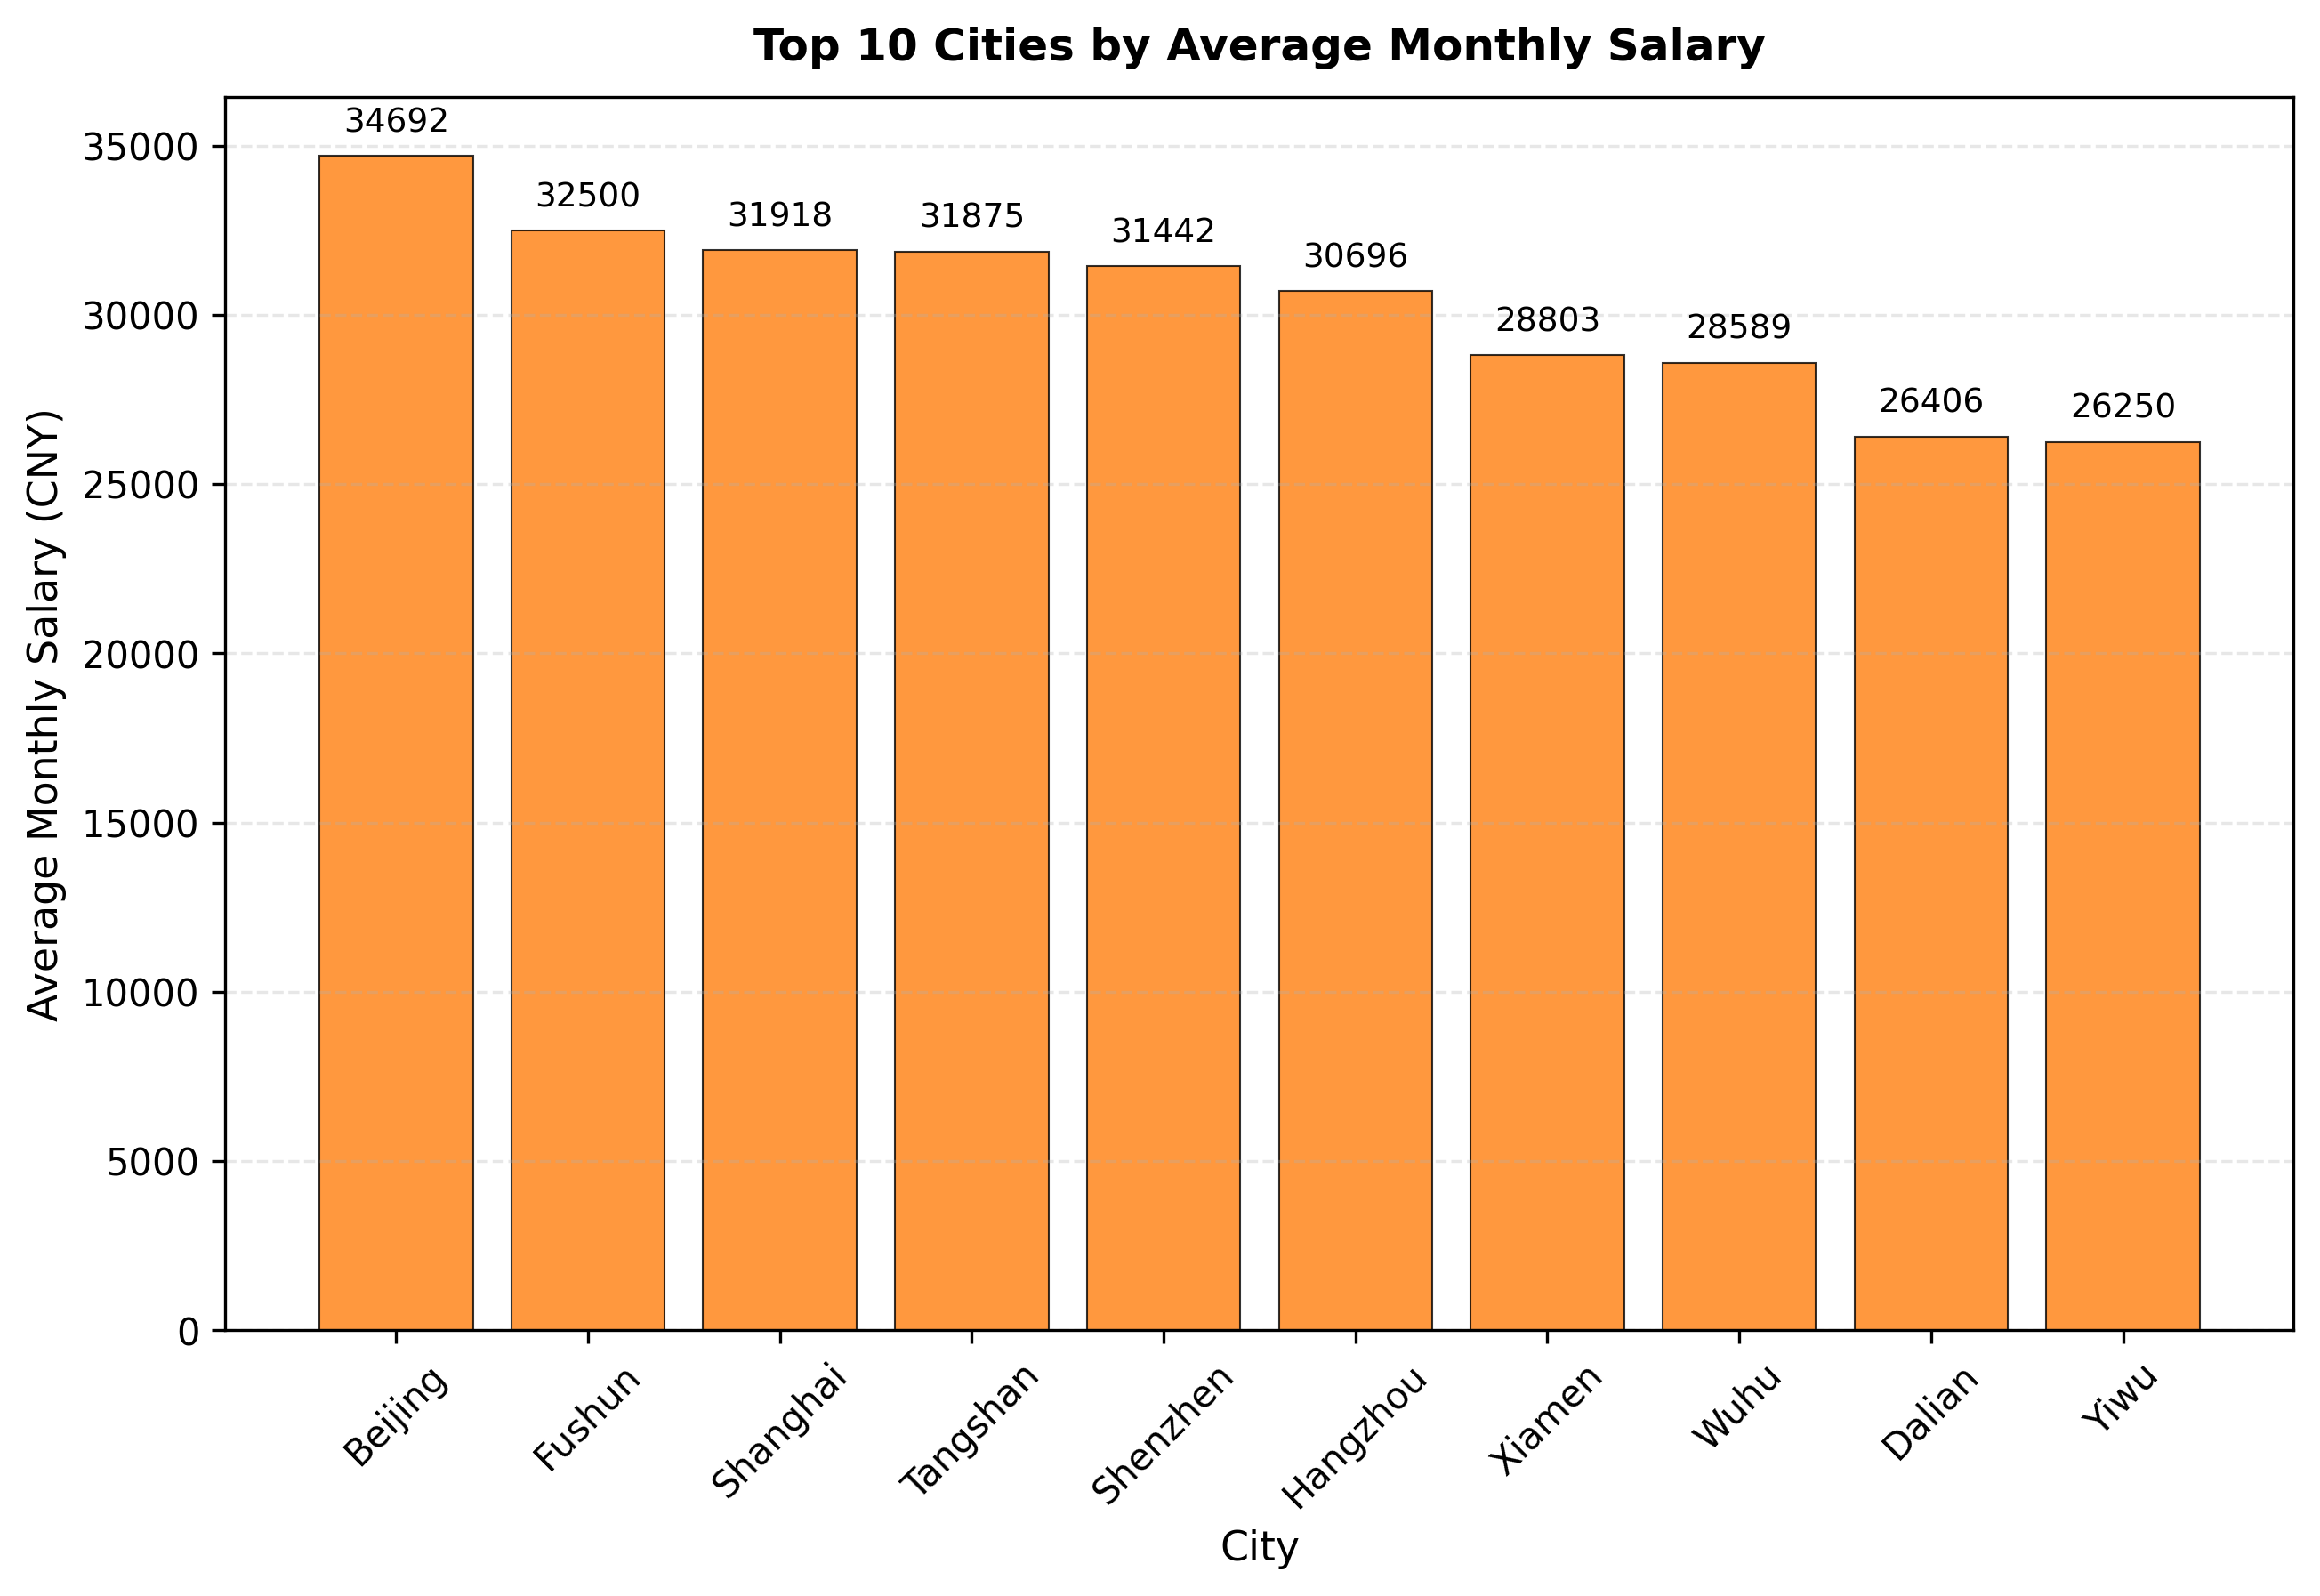

In [64]:
city_salary = df_english.groupby("City")["Average Monthly Salary (CNY)"].mean().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(
    city_salary.index,
    city_salary.values,
    color=colors[1],
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5
)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 500,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=9
    )

ax.set_title("Top 10 Cities by Average Monthly Salary", fontsize=12, fontweight="bold", pad=10)
ax.set_xlabel("City", fontsize=11)
ax.set_ylabel("Average Monthly Salary (CNY)", fontsize=11)
ax.tick_params(axis="x", rotation=45)
ax.grid(axis="y", linestyle="--", alpha=0.3)

plt.savefig("top10_cities_salary_barchart.png")
plt.show()

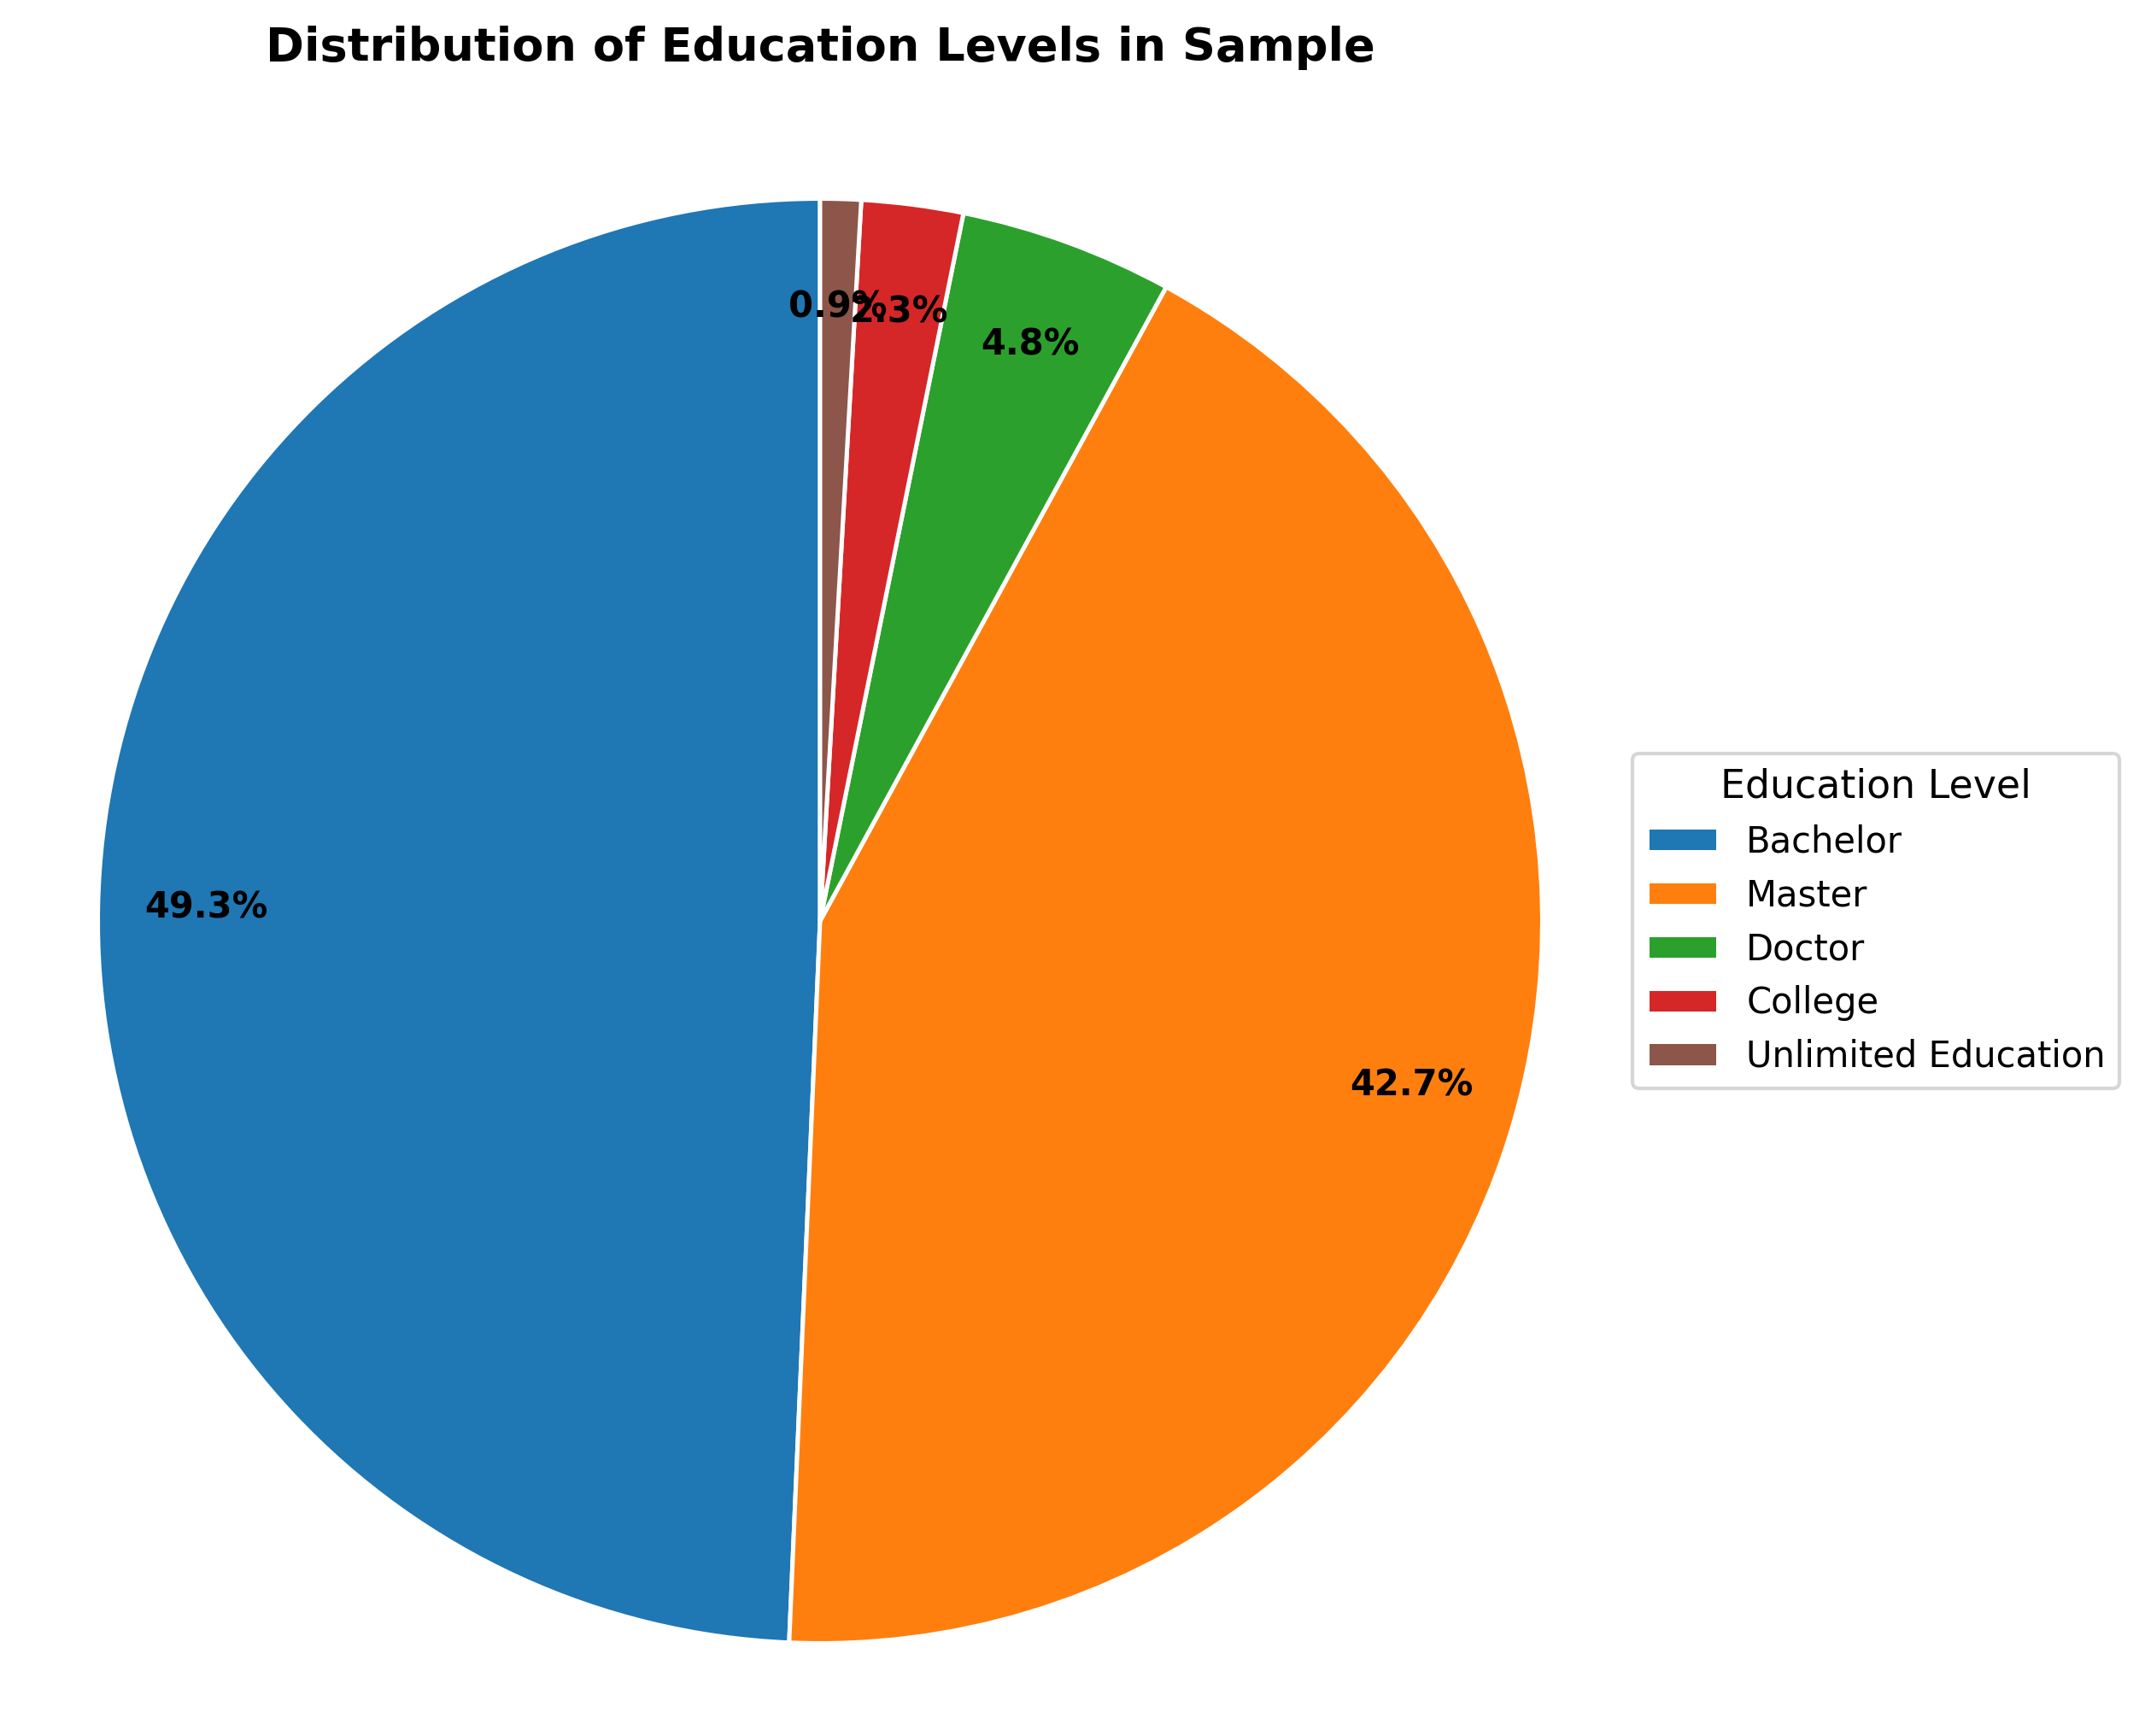

In [65]:
edu_counts = df_english["Education"].value_counts().sort_values(ascending=False)

plt.rcParams["font.size"] = 11
plt.rcParams["axes.linewidth"] = 0.8
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["savefig.format"] = "png"

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728","#8c564b"]

fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    edu_counts.values,
    labels=None,
    autopct="%1.1f%%",
    colors=colors[:len(edu_counts)],
    shadow=False,
    startangle=90,
    pctdistance=0.85,
    wedgeprops={"edgecolor": "white", "linewidth": 1.2}
)

for autotext in autotexts:
    autotext.set_color("black")
    autotext.set_fontweight("bold")
    autotext.set_fontsize(10)

ax.legend(
    wedges,
    edu_counts.index,
    title="Education Level",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10,
    title_fontsize=11
)

ax.set_title(
    "Distribution of Education Levels in Sample",
    fontsize=13,
    fontweight="bold",
    pad=20
)

ax.axis("equal")
plt.axis("off")

plt.savefig("education_distribution_piechart_optimized.png", dpi=300, bbox_inches="tight")
plt.show()

In [66]:
import pandas as pd
import numpy as np

total_samples = len(df_english)
unique_education = df_english["Education"].value_counts()
unique_cities = df_english["City"].value_counts()

salary_stats = df_english["Average Monthly Salary (CNY)"].describe().round(2)

print("=== Descriptive Statistics of Data Algorithm Engineer Dataset ===")
print(f"Total number of samples: {total_samples}")
print(f"Unique education levels: {unique_education}")
print(f"Unique cities: {unique_cities}")
print("\nSalary Statistics (Average Monthly Salary in CNY):")
print(salary_stats)

=== Descriptive Statistics of Data Algorithm Engineer Dataset ===
Total number of samples: 440
Unique education levels: Education
Bachelor               217
Master                 188
Doctor                  21
College                 10
Unlimited Education      4
Name: count, dtype: int64
Unique cities: City
Shanghai     74
Beijing      62
Shenzhen     57
Hangzhou     44
Guangzhou    26
Nanjing      21
Chengdu      19
Wuhan        14
Suzhou       14
Xi'an        11
Wuxi         10
Changsha     10
Hefei         9
Chongqing     7
Wuhu          7
Xiamen        7
Qingdao       4
Dalian        4
Foshan        4
Jinan         4
Zhengzhou     3
Tianjin       3
Fuzhou        3
Dongguan      3
Tangshan      2
Yiwu          2
Kunming       1
Jiaxing       1
Shenyang      1
Yichang       1
Nanyang       1
Taiyuan       1
Changzhou     1
Nantong       1
Weihai        1
Taizhou       1
Nanchang      1
Zhuhai        1
Xuzhou        1
Fushun        1
Quzhou        1
Weifang       1
Name: count, dtyp